In [2]:
import os
import sys
from collections import OrderedDict
import numpy as np
import torch
import torchvision
from torchvision import datasets, transforms
from PIL import Image as pilimage
import torchvision.models
from torch.utils import model_zoo
import pandas as pd
import probabilities_to_decision
import torch.nn.functional as F
import torch.optim as optim
from IPython.display import Image as pyimg, display

1.8.1


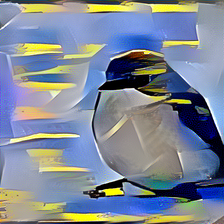

Using the ResNet50 architecture.
(1000,)
truck
Model download completed.
Model printing completed.


In [27]:
# load_pretrained_models.py
print(torch.__version__)
def load_model(model_name):

    model_urls = {
            'resnet50_trained_on_SIN': 'https://bitbucket.org/robert_geirhos/texture-vs-shape-pretrained-models/raw/6f41d2e86fc60566f78de64ecff35cc61eb6436f/resnet50_train_60_epochs-c8e5653e.pth.tar',
            'resnet50_trained_on_SIN_and_IN': 'https://bitbucket.org/robert_geirhos/texture-vs-shape-pretrained-models/raw/60b770e128fffcbd8562a3ab3546c1a735432d03/resnet50_train_45_epochs_combined_IN_SF-2a0d100e.pth.tar',
            'resnet50_trained_on_SIN_and_IN_then_finetuned_on_IN': 'https://bitbucket.org/robert_geirhos/texture-vs-shape-pretrained-models/raw/60b770e128fffcbd8562a3ab3546c1a735432d03/resnet50_finetune_60_epochs_lr_decay_after_30_start_resnet50_train_45_epochs_combined_IN_SF-ca06340c.pth.tar',
            'alexnet_trained_on_SIN': 'https://bitbucket.org/robert_geirhos/texture-vs-shape-pretrained-models/raw/0008049cd10f74a944c6d5e90d4639927f8620ae/alexnet_train_60_epochs_lr0.001-b4aa5238.pth.tar',
    }
    if "resnet50" in model_name:
        print("Using the ResNet50 architecture.")
        model = torchvision.models.resnet50(pretrained=True).eval()
        model = torch.nn.DataParallel(model).cuda()
        checkpoint = model_zoo.load_url(model_urls[model_name])
    elif "vgg16" in model_name:
        print("Using the VGG-16 architecture.")

        # download model from URL manually and save to desired location
        filepath = "./vgg16_train_60_epochs_lr0.01-6c6fcc9f.pth.tar"

        assert os.path.exists(filepath), "Please download the VGG model yourself from the following link and save it locally: https://drive.google.com/drive/folders/1A0vUWyU6fTuc-xWgwQQeBvzbwi6geYQK (too large to be downloaded automatically like the other models)"

        model = torchvision.models.vgg16(pretrained=False)
        model.features = torch.nn.DataParallel(model.features)
        model.cuda()
        checkpoint = torch.load(filepath)


    elif "alexnet" in model_name:
        print("Using the AlexNet architecture.")
        model = torchvision.models.alexnet(pretrained=False)
        model.features = torch.nn.DataParallel(model.features)
        model.cuda()
        checkpoint = model_zoo.load_url(model_urls[model_name])
    else:
        raise ValueError("unknown model architecture.")

    model.load_state_dict(checkpoint["state_dict"])
    return model


#def softmax(model):
#    assert len(model.shape) == 1
#    s = np.max(model, axis=1)
#    s = s[:, np.newaxis] # necessary step to do broadcasting
#    e_x = np.exp(z - s)
#    div = np.sum(e_x, axis=1)
#    div = div[:, np.newaxis] # dito
#    return e_x / div

if __name__ == "__main__":

    # Abbreviations:
    # SIN = Stylized-ImageNet
    # IN = normal, standard ImageNet

    model_A = "resnet50_trained_on_SIN"
    model_B = "resnet50_trained_on_SIN_and_IN"
    model_C = "resnet50_trained_on_SIN_and_IN_then_finetuned_on_IN"

    # Note: these two models correspond to the ones reported in Figure 11.
    # Hyperparameters (learning rate etc.) were NOT optimised (this was
    # done in the rebuttal period with limited time), thus these
    # models have lower performance than a typical model would have.
    # If peak performance is important to you, I suggest to train the model
    # yourself.
    model_D = "vgg16_trained_on_SIN"
    model_E = "alexnet_trained_on_SIN"
    # Replace the figure name
    OBJ = pyimg(filename='bird1-airplane2.png')
    display(OBJ)
    
    model = load_model(model_A) # change to different model as desired
    im = pilimage.open('bird1-airplane2.png')
    test_transforms = transforms.Compose([transforms.ToTensor()])
    image_tensor = test_transforms(im).float()
    image_tensor = image_tensor.unsqueeze_(0)
    out1 = model(image_tensor)
    out_smax_values = F.softmax(out1, dim=1).detach().cpu().numpy()
    # print(out_smax_values)
    # print(np.sum(out_smax_values))
    # print(out_smax_values.shape)
    
    #print(type(model))
    #print(type(model.module.cpu().state_dict().values()))
    #print(model.module.cpu().state_dict().items())
    lst = []
    #an_array = np.empty((64, 3, 7, 7))
    #for k, v in model.module.cpu().state_dict().items():
        #print("K=",k, "V",v)
        #temp = F.softmax(v.float(), dim=0).numpy()
        #print(v.shape)
        #print(temp)
        #lst.append(temp)
        #print(np.shape(lst))
        #print(lst)
        #numpy_array = np.array(lst)
    #print(numpy_array.shape)
        #print(F.softmax(v.float(), dim=0).sum())
    #tensors = torch.Tensor(tensor_list)
    #cat_tensor = torch.cat(tensor_list, dim=0)
    #print(v.shape)
    #print(cat_tensor.shape)
        #gg = torch.cat((v))
    #jj = torch.nn.Softmax(model.module.state_dict().values())
    #print(jj)
    #lst = []
    #lst = list(model.module.cpu().state_dict().values())
    #for k, v in model.module.cpu().state_dict().items():
    #    _
    #print(v)
    #m = torch.nn.Softmax(dim=1)
    #softmax_output_numpy = m(mm)
    #softmax_output_numpy = np.array(lst, dtype=object)
    #print(len(softmax_output_numpy.shape),"length")
    #print("Softmax", softmax(softmax_output_numpy))
    # create mlapping
    mapping = probabilities_to_decision.ImageNetProbabilitiesTo16ClassesMapping()
    # obtain decision
    out_smax_values = np.array([j for j in out_smax_values[0][:]])
    print(out_smax_values.shape)
    decision_from_16_classes = mapping.probabilities_to_decision(out_smax_values)
    print(decision_from_16_classes)

    print("Model download completed.")

    # sanity check: print state_dict
    #try:
    #    for k, v in model.module.state_dict().items():
    #        print(v)
    #except AttributeError:
    #    for k, v in model.state_dict().items():
    #        print(k)

    print("Model printing completed.")